In [1]:
# load data to pandas data frame
import pandas as pd
import numpy as np

doc_data = pd.read_csv('./movies_genre_60.csv', sep=",", header=0 )
movie_titles = doc_data['Title'].tolist()  # convert column Title of panda frame to list
movie_synopses = doc_data['Synopsis'].tolist()
movie_genre = doc_data['Genre'].tolist()
doc_data

,Genre,Title,Synopsis
0,Action_Horror_Sci-Fi,1.1_Alien: Resurrection (1997),"200 years after the events of Alien 3, scienti..."
1,Action_Horror_Sci-Fi,1.2_Ghosts of Mars (2001),"200 years in the future, Mars has been coloniz..."
2,Action_Horror_Sci-Fi,1.3_Resident Evil: Apocalypse (2004),"30 days after the contamination of The Hive, t..."
3,Action_Horror_Sci-Fi,1.4_The Colony (I) (2013),A terrified woman (Alex Paxton-Beesley) and a ...
4,Action_Horror_Sci-Fi,1.5_They Live (1988),George Nada (Roddy Piper) is a homeless labore...
5,Action_Horror_Sci-Fi,1.6_Jason X (2001),"In 2008, Jason Voorhees is captured by the U.S..."
6,Action_Horror_Sci-Fi,1.7_Alien³ (1992),"In the movie's opening credits, the Sulaco, th..."
7,Action_Horror_Sci-Fi,1.8_DeepStar Six (1989),"In the opening scene, Jim McBride (\r\nGreg Ev..."
8,Action_Horror_Sci-Fi,1.9_The Meg (2018),"In the opening scene, Jonas Taylor (Jason Stat..."
9,Action_Horror_Sci-Fi,1.10_Resident Evil (2002),"In the opening shot, a voice-over narrator exp..."


#### Pre-Processing text

In [2]:
# Define function for Lemmatization, remove stopword and feature selection using POS, spacy package
import spacy
def spacy_preprocess(text,lemma= True, pos= True, pos_select = ["VERB", "NOUN", "ADJ","ADV","PART"]):
  # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
    nlp = spacy.load('en', disable=['parser', 'ner']) # disable parser, ner for faster loading
  # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(text)
    
    if pos== False:
        if lemma== True: text_preprocess= " ".join([token.lemma_.lower() for token in doc if not nlp.vocab[token.text].is_stop])
        if lemma== False:text_preprocess= " ".join([token.text.lower() for token in doc if not nlp.vocab[token.text].is_stop])
    else:
        if lemma== True : text_preprocess= " ".join([token.lemma_.lower() for token in doc if (token.pos_ in pos_select and not nlp.vocab[token.text].is_stop)])
        if lemma== False : text_preprocess= " ".join([token.text.lower() for token in doc if (token.pos_ in pos_select  and not nlp.vocab[token.text].is_stop)])
  # nlp.vocab[token.text].is_stop to remove stopwords
    return text_preprocess

In [3]:
# Pre-processing data with spacy
from tqdm import tqdm
movie_synopses_preprocess=[]
for movie in tqdm(movie_synopses):
    movie_preprocess = spacy_preprocess(movie,pos_select = ["VERB", "NOUN", "ADJ"])
    movie_synopses_preprocess+= [movie_preprocess]

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:42<00:00,  1.40it/s]


Build feature matrix (tf-idf)

In [42]:
#change data input (movie_synopses or movie_synopses_preprocess) here
data_input1 = movie_synopses
data_input2 = movie_synopses_preprocess 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.8, max_features= None)
feature_matrix1 = vectorizer.fit_transform(data_input1).astype(float)
feature_names1 = vectorizer.get_feature_names() # get feature names
print("number of feature:", len(feature_names1))

feature_matrix2 = vectorizer.fit_transform(data_input2).astype(float)
feature_names2 = vectorizer.get_feature_names() # get feature names
print("number of feature:", len(feature_names2))

number of feature: 1131
number of feature: 789


#### Kmean Clustering

(a) Test 1: Does using text preprocessing give a better result?  
Run Kmean clustering in 2 cases and compare the purify

In [43]:
from sklearn.cluster import KMeans
#function for Kmean clustering
def k_means(feature_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters, n_init=500, random_state = 1,
                max_iter=10000)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

def get_cluster_data(clustering_obj, doc_data, 
                     feature_names, num_clusters,
                     topn_features=10):

    cluster_details = {}  
    # get cluster centroids
    ordered_centroids = clustering_obj.cluster_centers_.argsort()[:, ::-1]
    # get key features for each cluster
    # get docs belonging to each cluster
    for cluster_num in range(num_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster_num'] = cluster_num
        key_features = [feature_names[index] 
                        for index 
                        in ordered_centroids[cluster_num, :topn_features]]
        cluster_details[cluster_num]['key_features'] = key_features
        
        docs = doc_data[doc_data['Cluster'] == cluster_num]['Title'].values.tolist()
        cluster_details[cluster_num]['docs'] = docs
    
    return cluster_details

def print_clusters(cluster_data):
    # print cluster details
    for cluster_num, cluster_details in cluster_data.items():
        print ('Cluster {} details:'.format(cluster_num))
        print ('-'*20)
        print ('Key features:', cluster_details['key_features'])
        print ('docs in this cluster:')
        print (', '.join(cluster_details['docs']))
        print ('='*40)

In [52]:
def count_purity(cluster_data):
    max_group = 0
    for cluster_num, cluster_details in cluster_data.items():
        group1, group2, group3 = 0, 0, 0
        
        for item in cluster_details['docs']:
            if item.split('.')[0] == '1':
                group1 += 1
            elif item.split('.')[0]  == '2':
                group2 += 1
            else:
                group3 += 1
        print(group1, group2, group3)
        max_group += max(group1, group2, group3)
        #print(max_group)
    return max_group / 60

without preprocess

In [53]:
# assume that we want to clustering withy k =3
num_clusters = 3
km_obj1, km_clusters1 = k_means(feature_matrix=feature_matrix1,
                           num_clusters=num_clusters)

doc_data['Cluster'] = km_clusters1

km_cluster_data1 =  get_cluster_data(clustering_obj=km_obj1,
                                 doc_data = doc_data,
                                 feature_names=feature_names1,
                                 num_clusters=num_clusters,
                                 topn_features=10)

print_clusters(km_cluster_data1) 

purity = count_purity(km_cluster_data1)
print("Purity: ", purity)

Cluster 0 details:
--------------------
Key features: ['from', 'house', 'school', 'home', 'wedding', 'back', 'father', 'love', 'while', 'time']
docs in this cluster:
1.16_The Purge: Election Year (2016), 2.1_No Strings Attached (I) (2011), 2.2_Pretty Woman (1990), 2.3_Coming to America (1988), 2.4_Amélie (2001), 2.5_Blame It on Rio (1984), 2.6_Annie Hall (1977), 2.7_Sex Tape (2014), 2.8_Bridesmaids (I) (2011), 2.9_Arthur (1981), 2.10_Yes Man (2008), 2.11_Summer School (1987), 2.12_Sixteen Candles (1984), 2.13_Knocked Up (2007), 2.14_The Secret of My Success (1987), 2.15_Serendipity (2001), 2.16_One Crazy Summer (1986), 2.17_Clueless (1995), 2.18_Just Friends (I) (2005), 2.19_Just Go with It (2011), 2.20_Dave (1993), 3.3_Birdy (1984), 3.7_Salon Kitty (1976), 3.8_Ivan's Childhood (1962), 3.12_Before the Rain (1994), 3.19_Fugitive Pieces (2007)
Cluster 1 details:
--------------------
Key features: ['camp', 'from', 'war', 'men', 'german', 'soldier', 'sergeant', 'soldiers', 'captain', 'vill

with preprocess

In [54]:
km_obj2, km_clusters2 = k_means(feature_matrix=feature_matrix2,
                           num_clusters=num_clusters)

doc_data['Cluster'] = km_clusters2

km_cluster_data2 =  get_cluster_data(clustering_obj=km_obj2,
                                 doc_data = doc_data,
                                 feature_names=feature_names2,
                                 num_clusters=num_clusters,
                                 topn_features=10)

print_clusters(km_cluster_data2) 

Cluster 0 details:
--------------------
Key features: ['kill', 'shoot', 'try', 'attack', 'crew', 'ship', 'creature', 'go', 'tell', 'escape']
docs in this cluster:
1.1_Alien: Resurrection (1997), 1.2_Ghosts of Mars (2001), 1.3_Resident Evil: Apocalypse (2004), 1.4_The Colony (I) (2013), 1.5_They Live (1988), 1.6_Jason X (2001), 1.7_Alien³ (1992), 1.8_DeepStar Six (1989), 1.9_The Meg (2018), 1.10_Resident Evil (2002), 1.11_The Purge: Anarchy (2014), 1.12_Predator 2 (1990), 1.13_Upgrade (2018), 1.14_Underwater (2020), 1.15_The First Purge (2018), 1.16_The Purge: Election Year (2016), 1.17_Morgan (2016), 1.18_Blade (1998), 1.19_Hollow Man (2000), 1.20_Aliens vs. Predator: Requiem (2007), 3.14_The Caine Mutiny (1954)
Cluster 1 details:
--------------------
Key features: ['tell', 'love', 'school', 'time', 'relationship', 'friend', 'wedding', 'father', 'film', 'take']
docs in this cluster:
2.1_No Strings Attached (I) (2011), 2.2_Pretty Woman (1990), 2.3_Coming to America (1988), 2.4_Amélie (2

In [55]:
purity2 = count_purity(km_cluster_data2)
print("Purity: ", purity2)

20 0 1
0 20 6
0 0 13
Purity:  0.8833333333333333


We can see that the purity is the same with or without text preprocess, but I think with text preprocess is better so I gonna use the result.

(b) Test 2: if we limit the max_feature, does it affect the model performance? 

In [65]:
def compare_max_feature(max_feature):
    vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.8, max_features= max_feature)
    feature_matrix = vectorizer.fit_transform(data_input2).astype(float)
    feature_names = vectorizer.get_feature_names() # get feature names
    print("number of feature:", len(feature_names))
    km_obj, km_clusters = k_means(feature_matrix=feature_matrix,
                               num_clusters=num_clusters)

    doc_data['Cluster'] = km_clusters

    km_cluster_data =  get_cluster_data(clustering_obj=km_obj,
                                     doc_data = doc_data,
                                     feature_names=feature_names,
                                     num_clusters=num_clusters,
                                     topn_features=10)

    #rint_clusters(km_cluster_data)
    purity = count_purity(km_cluster_data)
    #print("Purity: ", purity)
    return purity

number of feature: 100
1 0 18
0 20 2
19 0 0
number of feature: 200
20 0 0
0 20 4
0 0 16
number of feature: 300
0 0 14
0 20 5
20 0 1
number of feature: 400
0 0 14
20 0 0
0 20 6
number of feature: 500
0 20 6
19 0 1
1 0 13
number of feature: 600
0 20 6
19 0 1
1 0 13
number of feature: 700
20 0 1
0 20 6
0 0 13


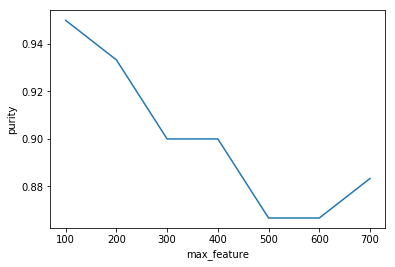

In [66]:
purity = []
for i in range(100,800,100):
    purity.append(compare_max_feature(i))

import matplotlib.pyplot as plt 

max_feature = [100, 200, 300, 400, 500, 600, 700]
plt.plot(max_feature, purity) 
plt.xlabel('max_feature') 
plt.ylabel('purity') 
plt.show() 

Conclusion:

#### Ward Hierarchical clustering

(c1) Run Ward Hierarchical clustering in 2 cases (with and without preprocessing). 
Looking at the dendrogram graph, according to you, which case give better result.  

In [67]:
# Function to form and plot hierarchical clustering

def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

def plot_hierarchical_clusters(linkage_matrix, doc_data, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size,dpi=150) 
    doc_titles = doc_data['Title'].values.tolist()
    # plot dendrogram
    ax = dendrogram(linkage_matrix, orientation="left", labels=doc_titles)
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom=False,
                    top=False,
                    labelbottom= False)
    plt.tight_layout()
    plt.savefig('./hierachical_full.png', dpi=600)

import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
import random
from matplotlib.font_manager import FontProperties
from scipy.cluster.hierarchy import ward, dendrogram

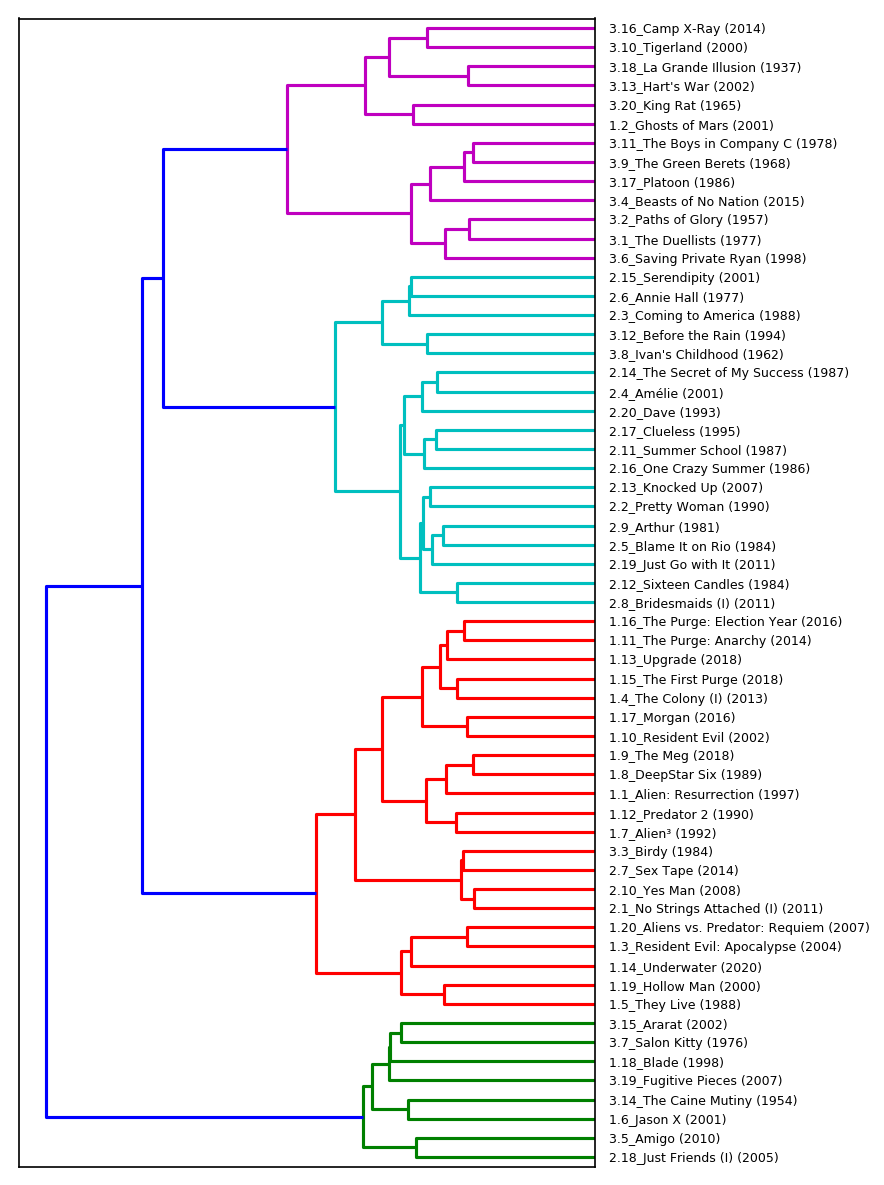

In [68]:
# without preprocessing
linkage_matrix = ward_hierarchical_clustering(feature_matrix1)
plot_hierarchical_clusters(linkage_matrix=linkage_matrix, doc_data=doc_data, figure_size=(6,8))

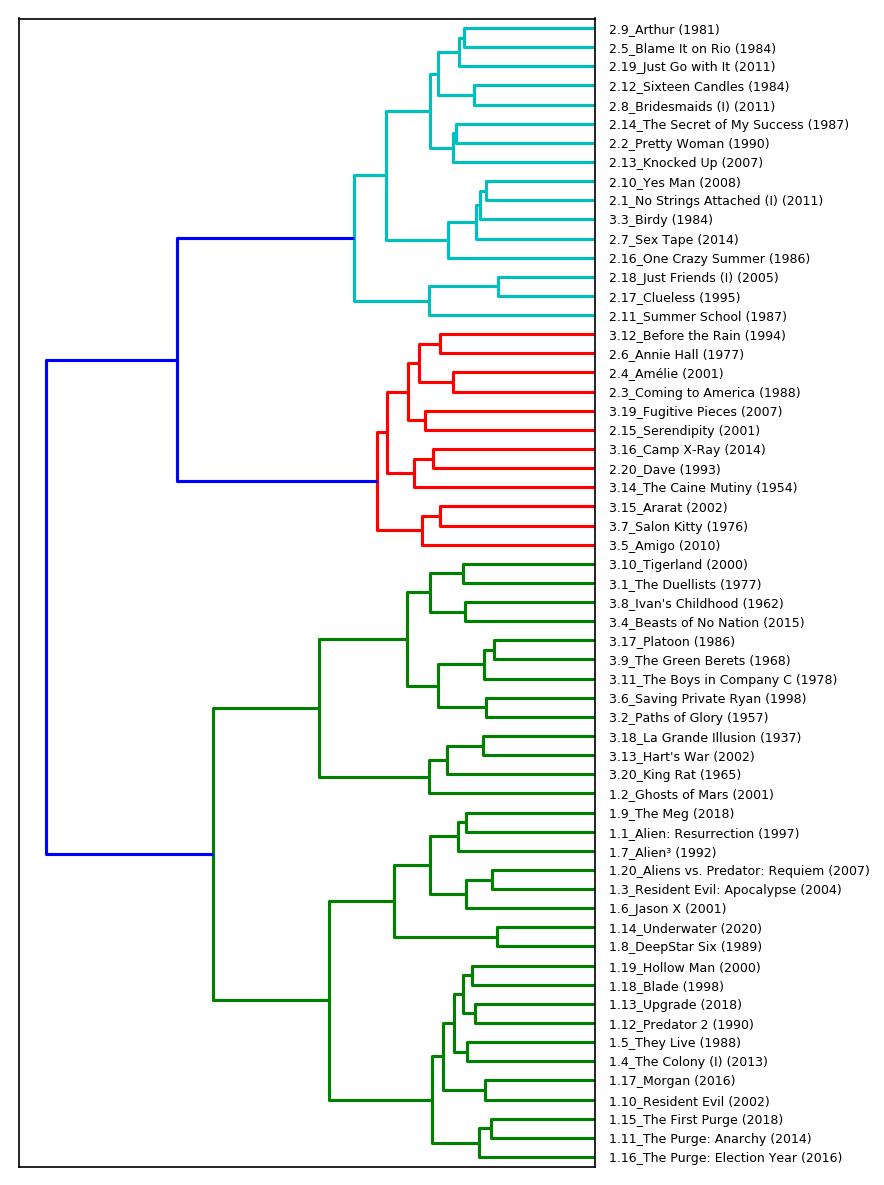

In [69]:
# with preprocessing
linkage_matrix = ward_hierarchical_clustering(feature_matrix2)
plot_hierarchical_clusters(linkage_matrix=linkage_matrix, doc_data=doc_data, figure_size=(6,8))

(c2) Compare with Kmean: what are the pros and cons in this case? 
(you need to look at result and give your opinion, you will not get points for theoretical comparisons only) 



#### SOM Clustering

Can you separate or distinguish the area of 3 group of movies? <br>
In your opinion, what is the pros and cons of SOM? <br>
* the SOM clustering result sometime make confusing, fell free to give your opinion.  
* you can change some parameter such as number of neuron output.

In [8]:
!pip install minisom

In [87]:
#Step 1 tranining the Neural network 
D = feature_matrix.todense().tolist()
from minisom import MiniSom
max_features=len(feature_names)
xmap_dim =6
ymap_dim =6


som = MiniSom(x=xmap_dim, y= ymap_dim, input_len= max_features, random_seed=1)

import time
start = time.time()

#start training
som.pca_weights_init(D)
som.train_batch(data=D, num_iteration= max_features*100)
#end tranining
end = time.time()
print(end - start,'seconds')

15.83068060874939 seconds


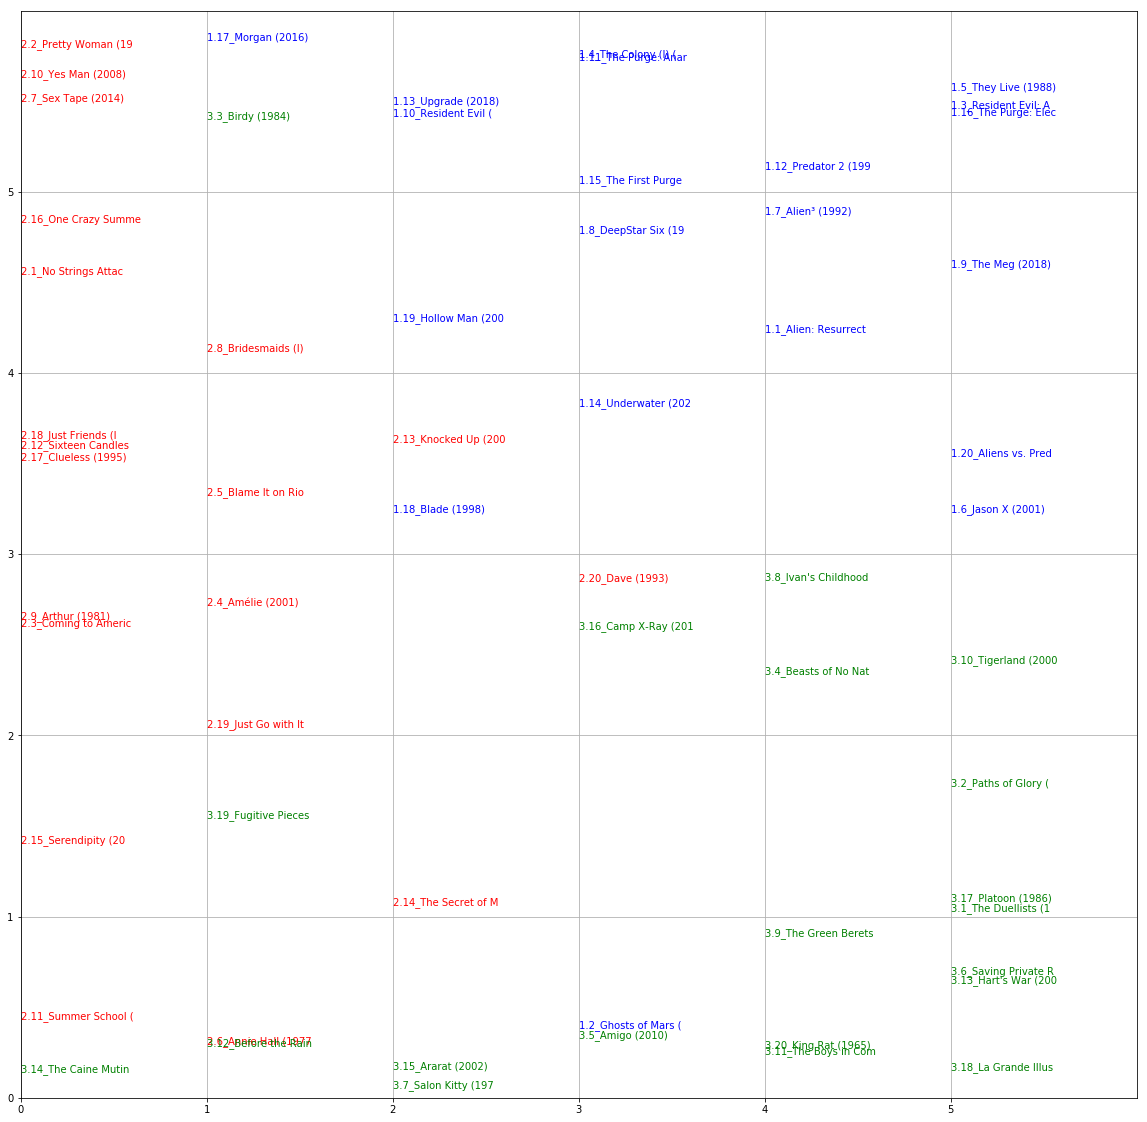

In [88]:
# show cluster in movies titles
titles=movie_titles

plt.figure(figsize=(20, 20))
colors = ['blue', 'red', 'green']
for i, (t, vec) in enumerate(zip(titles, D)):
    winnin_position = som.winner(vec)
    if t[0] == '1':
        plt.text(winnin_position[0], winnin_position[1]+np.random.rand()*0.9, t[0:20], color=colors[0])
    elif t[0] == '2':
        plt.text(winnin_position[0], winnin_position[1]+np.random.rand()*0.9, t[0:20], color=colors[1])
    else:
        plt.text(winnin_position[0], winnin_position[1]+np.random.rand()*0.9, t[0:20], color=colors[2])
    
plt.xticks(range(xmap_dim))
plt.yticks(range(ymap_dim))
plt.grid()
plt.xlim([0, xmap_dim])
plt.ylim([0, ymap_dim])
plt.plot()
plt.savefig('./som_titles.png', dpi=300)

In [72]:
#Movies name, key feature and genre of every cluster
top_keywords =10
weights = som.get_weights()
for i in range(xmap_dim):
    for j in range(ymap_dim):
        keywords_idx = np.argsort(weights[i,j,:])[-top_keywords:]
        keywords = ' '.join([feature_names[k] for k in keywords_idx])
        print('\n')
        print('Cell', i,'-',j, '-','keyword:', keywords)
        movies_t =[]     
        for k, (t, g, vec) in enumerate(zip(movie_titles, movie_genre, D)):
            winnin_position = som.winner(vec)
            if winnin_position[0]==i and winnin_position[1]==j: 
                movies_t+=[t]
          
        print('Titles:', movies_t)



Cell 0 - 0 - keyword: crew captain class teach go day job officer ship student
Titles: ['2.11_Summer School (1987)', '3.14_The Caine Mutiny (1954)']


Cell 0 - 1 - keyword: student time start love know mean wonder phone number marry
Titles: ['2.15_Serendipity (2001)']


Cell 0 - 2 - keyword: daughter tell school meet family life wedding love father marry
Titles: ['2.3_Coming to America (1988)', '2.9_Arthur (1981)']


Cell 0 - 3 - keyword: successful drive wedding feeling party friend high house love school
Titles: ['2.12_Sixteen Candles (1984)', '2.17_Clueless (1995)', '2.18_Just Friends (I) (2005)']


Cell 0 - 4 - keyword: money movie raise work party house drive tell school friend
Titles: ['2.1_No Strings Attached (I) (2011)', '2.16_One Crazy Summer (1986)']


Cell 0 - 5 - keyword: money drive want take come tell go ask get say
Titles: ['2.2_Pretty Woman (1990)', '2.7_Sex Tape (2014)', '2.10_Yes Man (2008)']


Cell 1 - 0 - keyword: character story different happy view time success 